In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
# Reading the original dataset
data = pd.read_csv('all_stocks_5yr.csv')

In [3]:
# Taking first 100 datapoints from the dataset for the model to predict AAL stock
df = data.head(100)

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    100 non-null    object 
 1   open    100 non-null    float64
 2   high    100 non-null    float64
 3   low     100 non-null    float64
 4   close   100 non-null    float64
 5   volume  100 non-null    int64  
 6   Name    100 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ KB


In [6]:
df.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,16.276500,16.559700,15.983700,16.260500,7.368134e+06
std,1.393679,1.405494,1.423812,1.390213,4.055029e+06
min,13.140000,13.420000,12.700000,13.020000,2.382500e+06
25%,15.487500,15.957500,15.280000,15.665000,4.512900e+06
50%,16.500000,16.755000,16.165000,16.485000,6.483000e+06
75%,17.060000,17.275000,16.870000,17.012500,8.899375e+06
max,19.380000,19.700000,18.880000,19.120000,3.187990e+07


<AxesSubplot:xlabel='date'>

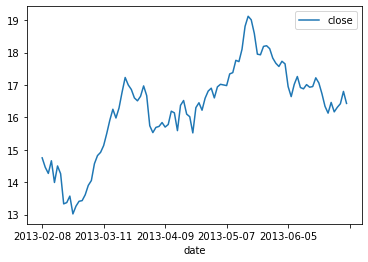

In [7]:
# Ploting a graph of date vs closing value of the share
df.plot('date','close')

In [8]:
# Training our model
X = np.array(df['open']).reshape(-1, 1)
y = np.array(df['close']).reshape(-1, 1)
 
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df.dropna(inplace = True)
 
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9534349998135963


<ipython-input-8-71742c537425>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


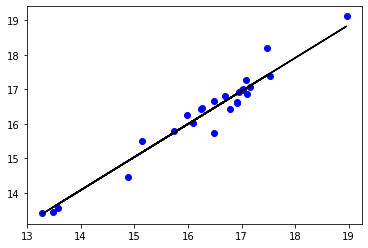

In [9]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values shows that our model 

In [10]:
# Now we see the probability of error in our model
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)

MAE: 0.21656383843709584


In [11]:
# predicting some values
  
Open_price = [ 78, 40, 100, 105, 159, 207]

for i in range(len(Open_price)):
    print(regr.predict([[Open_price[i]]]))

[[75.39087601]]
[[38.98647118]]
[[96.46711038]]
[[101.25716365]]
[[152.98973893]]
[[198.97425029]]
